<a href="https://colab.research.google.com/github/Pimentell/timeSeriesAnalysysAIQ/blob/main/Time_Series_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Neural Nets for Time Series Analysis.__

- Qué es una red neuronal?
- Perceptron
- Redes Neuronales Densas
- Redes Neuronales Recurrentes
- LSTM

### __Import Modules and Python Dependencies__

In [ ]:
import os
import datetime 
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

### __Creating Directory and Download Data from Google Drive__

In [ ]:
!rm -rf sample_data
!gdown 1GN1P7mrqLIIqIIfVtLluCW-s_PSgQf4E
!mkdir data
!unzip data.zip  -d data 

Downloading...
From: https://drive.google.com/uc?id=1GN1P7mrqLIIqIIfVtLluCW-s_PSgQf4E
To: /content/data.zip
100% 76.5M/76.5M [00:00<00:00, 233MB/s]
Archive:  data.zip
  inflating: data/city_day.csv       
  inflating: data/city_hour.csv      
  inflating: data/station_day.csv    
  inflating: data/station_hour.csv   
  inflating: data/stations.csv       



# __Air Quality Data in India (2015 - 2020)__

### Multivariate Time Series
#### __Import Data__

In [ ]:
data = pd.read_csv("data/city_day.csv", parse_dates=True)
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)

- __PM2.5 (Particulate Matter 2.5-micrometer)__: measured in ug / m3 (micrograms per cubic meter of air)
- __PM10 (Particulate Matter 10-micrometer)__: measured in ug / m3 (micrograms per cubic meter of air)
- __SO2 (Sulphur Dioxide)__:measured in ug / m3 (micrograms per cubic meter of air)
- __NOx (Any Nitric x-oxide)__: measured in ppb (parts per billion)
- __NH3 (Ammonia)__: measured in ug / m3 (micrograms per cubic meter of air)
- __CO (Carbon Monoxide)__:CO is measured in mg / m3 (milligrams per cubic meter of air)
- __O3 (Ozone or Trioxygen)__: O3 is measured in ug / m3 (micrograms per cubic meter of air)

- __AQI__: AIR Quality Index
![AQI](https://drive.google.com/uc?id=1zdwS3uFmkytjB4xlDOImnbnsVCaDAYzp)

### __Calidad del Aire por Ciudad__


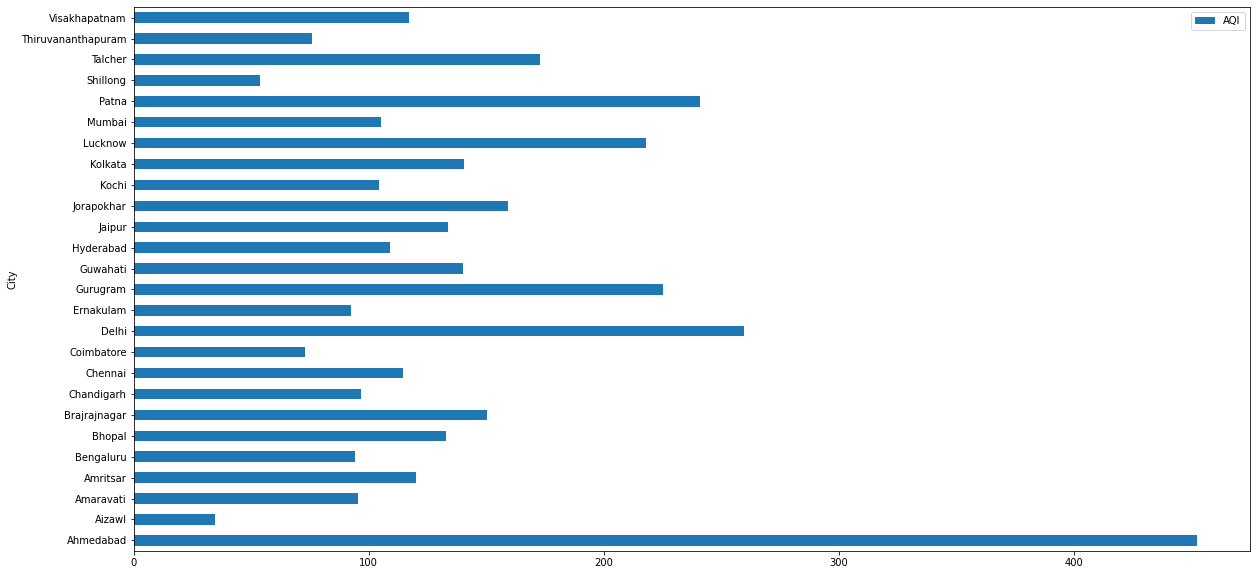

In [ ]:
data[["City", "AQI"]].groupby(["City"]).mean().plot.barh(figsize=(20,10))
plt.show()

### __Correlación calidad del aire y variables predictivas__

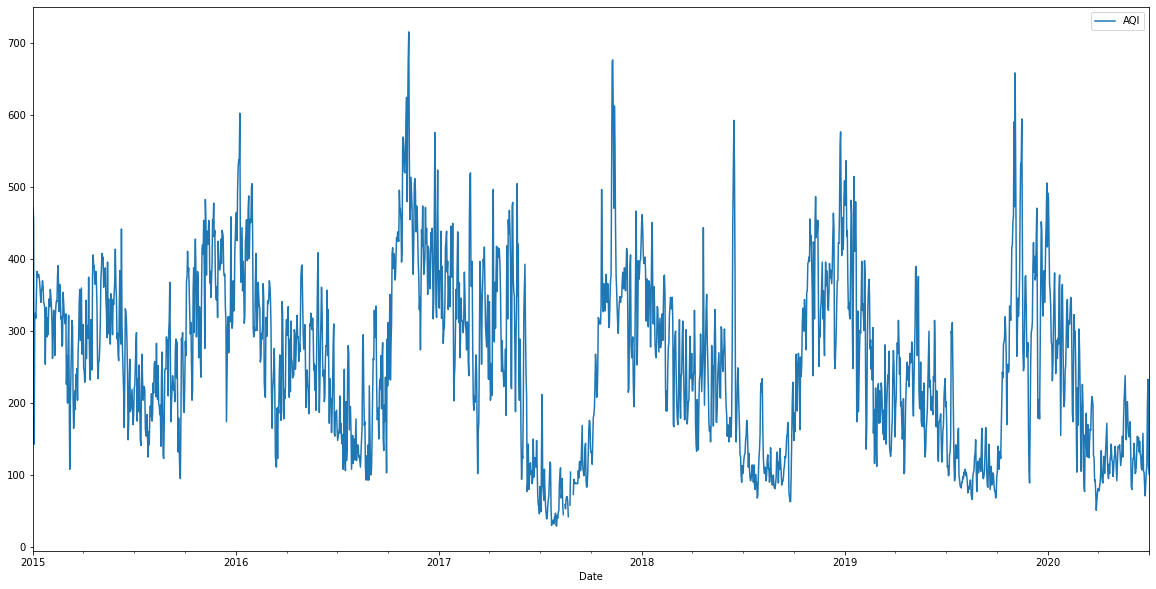

In [ ]:
data = data[data.City == "Delhi"] # Solo para nueva Delhi
data[["AQI"]].plot(figsize=(20,10))
plt.show()

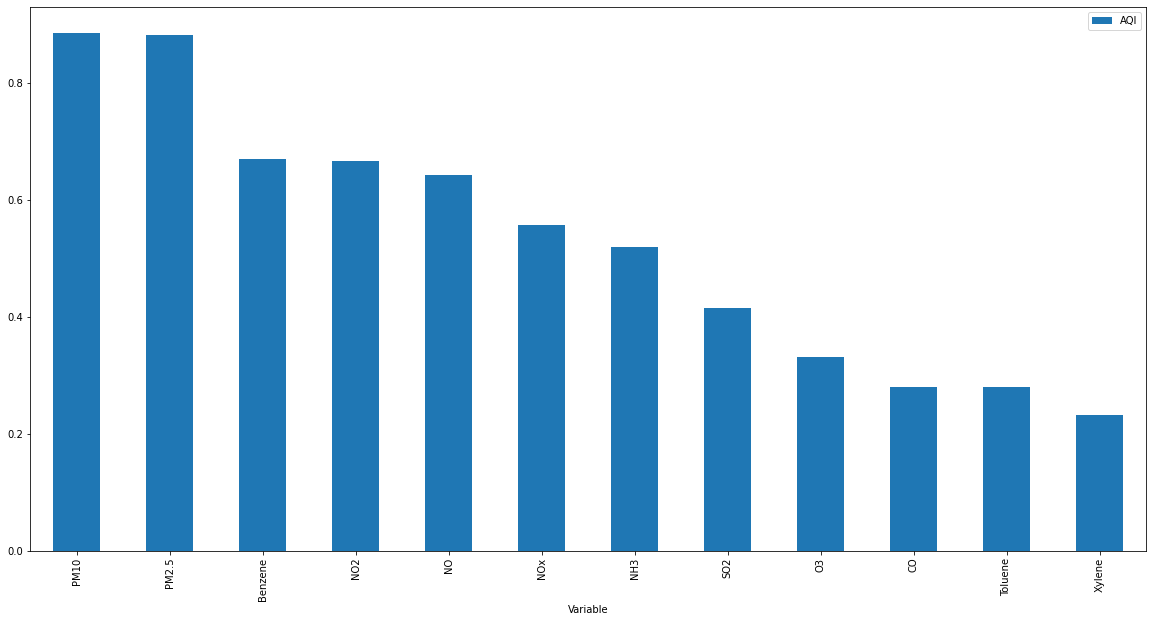

In [ ]:
data_corr = data.corr()\
  .reset_index()[["index", "AQI"]]\
  .sort_values(by = "AQI", ascending=False)\
  .rename(columns={"index":"Variable"})
data_corr = data_corr[data_corr.Variable != "AQI"]
data_corr.plot.bar(x="Variable", figsize=(20,10))
plt.show()

### __Data Cleaning__

In [ ]:
# Valores nulos por columna
# Eliminamos variables que no son necesarias o no se encuentran dentro del calculo del Indice de Calidad del Aire: 
data = data.drop(columns = ["Benzene", "Toluene", "Xylene", "City", "AQI_Bucket"])
data.isna().mean()

PM2.5    0.000996
PM10     0.038328
NO       0.000996
NO2      0.000996
NOx      0.000000
NH3      0.004480
CO       0.000000
SO2      0.054754
O3       0.041812
AQI      0.004978
dtype: float64

 El tratamiento normal para los datos nulos es la imputación. 

- Mean
- Median
- Regression

In [ ]:
data.fillna(data.mean(), inplace = True)
data.isna().mean()

PM2.5    0.0
PM10     0.0
NO       0.0
NO2      0.0
NOx      0.0
NH3      0.0
CO       0.0
SO2      0.0
O3       0.0
AQI      0.0
dtype: float64

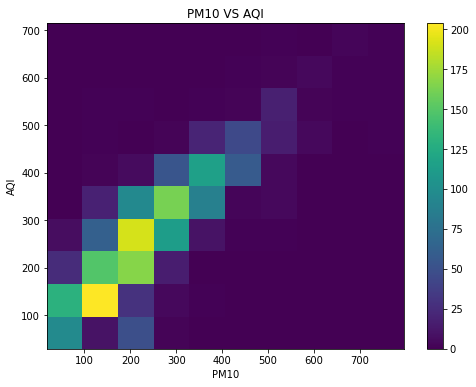

In [ ]:
plt.figure(figsize=(8,6))
plt.hist2d(data['PM10'], data['AQI'])
plt.colorbar()
plt.title("PM10 VS AQI")
plt.xlabel("PM10")
plt.ylabel('AQI')
plt.show()

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.323610,259.487744
std,82.871644,119.513475,33.372824,22.685415,37.690350,17.262405,2.560253,7.745483,25.511388,119.239308
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.940000,29.000000
25%,57.100000,138.810000,15.900000,33.900000,31.150000,31.220000,0.910000,10.460000,34.080000,162.000000
50%,94.670000,220.560000,27.250000,47.150000,52.750000,38.160000,1.240000,14.970000,45.450000,259.000000
75%,152.990000,307.380000,50.720000,63.570000,75.360000,48.680000,1.870000,19.360000,59.880000,345.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.730000,716.000000


### __Preparación de los Datos__

In [ ]:
data.to_csv("clean_data.csv", index = False)

with open("clean_data.csv") as f: 
  clean_data = f.read()

lines = clean_data.split("\n")[:-1]
header = lines[0].split(",")
lines = lines[1:]

aqi = np.zeros(len(lines),)
raw_variables = np.zeros((len(lines), len(header)-1))

for i, line in enumerate(lines): 
  values = [x for x in line.split(",")]
  aqi[i] = values[-1]
  raw_variables[i,:] = values[:-1]
  

In [ ]:
num_train_samples = int(0.5 * len(raw_variables))
num_val_samples = int(0.25 * len(raw_variables))
num_test_samples = len(raw_variables) - num_train_samples - num_val_samples

print("Entradas de entrenamiento: ", num_train_samples)
print("Entradas de validation: ", num_val_samples)
print("Entradas de test: ", num_test_samples)


Entradas de entrenamiento:  1004
Entradas de validation:  502
Entradas de test:  503


In [ ]:
# Normalización de los datos 
mean = raw_variables[:num_train_samples].mean(axis=0)
raw_variables -= mean
std = raw_variables[:num_train_samples].std(axis=0)
raw_variables /= std
raw_variables[0]

array([ 2.35583638,  3.06621182,  0.64054337, -0.80898171,  1.0805196 ,
       -0.47794941,  3.63845114, -0.85694203, -0.59394504])

In [ ]:
train_x = raw_variables[:num_train_samples]
val_x = raw_variables[num_train_samples:num_train_samples + num_val_samples]
test_x = raw_variables[num_train_samples + num_val_samples:]

In [ ]:
train_y = aqi[:num_train_samples]
val_y = aqi[num_train_samples:num_train_samples + num_val_samples]
test_y = aqi[num_train_samples + num_val_samples:]

# __Basic Linear Regresion__

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

reg = LinearRegression().fit(train_x, train_y)
R2 = reg.score(train_x, train_y)
print("Coeficiente de Determinación: ", R2)

Coeficiente de Determinación:  0.7949204939611545


In [ ]:
train_predict = reg.predict(train_x)
test_predict = reg.predict(test_x)
val_predict = reg.predict(val_x)

rmse_train = sqrt(mean_squared_error(train_y, train_predict))
rmse_test = sqrt(mean_squared_error(test_y, test_predict))
print('Train RMSE: %.3f' % rmse_train)
print('Test RMSE: %.3f' % rmse_test)

Train RMSE: 53.064
Test RMSE: 39.108


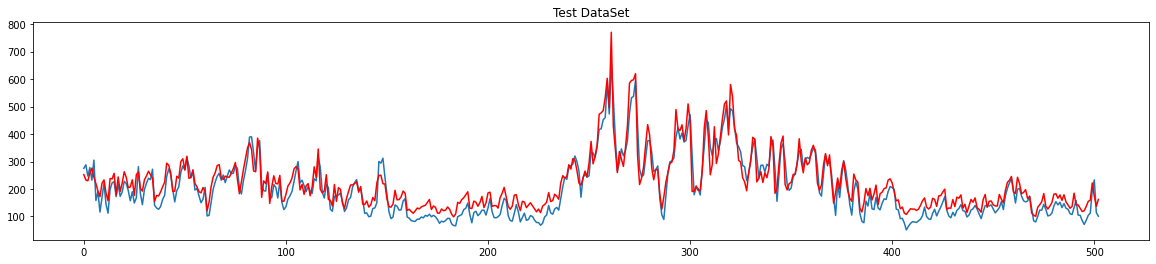

In [ ]:
t = np.arange(0,len(test_y),1)

plt.figure(figsize=(20,4))
plt.title("Test DataSet")
plt.plot(t,test_y,label="actual")
plt.plot(t,test_predict,'r',label="predicted")
plt.show()

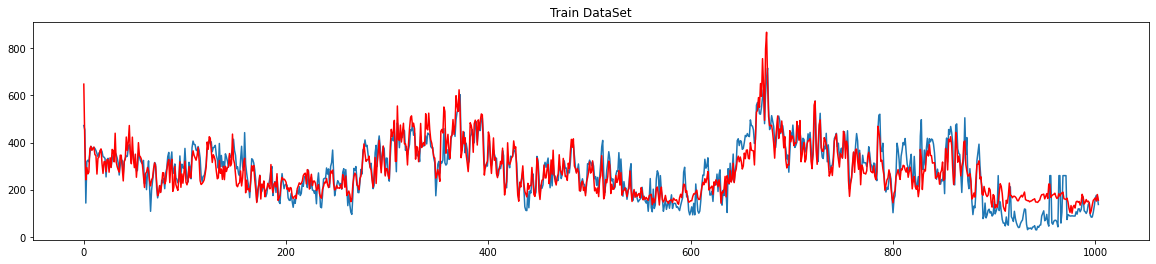

In [ ]:
t = np.arange(0,len(train_y),1)

plt.figure(figsize=(20,4))
plt.title("Train DataSet")
plt.plot(t,train_y,label="actual")
plt.plot(t,train_predict,'r',label="predicted")
plt.show()

# __Neural Nets Models__

![Neuron](https://drive.google.com/uc?id=10xLgWxoWUpHzX2kxVSE1MvfJ6w10fZrt)

Recuperado de: https://devskrol.com/wp-content/uploads/2020/11/neuron-296581_1280.png

## __Perceptron__

![](https://drive.google.com/uc?id=1J_SWo3N8ydc7vymRavEG_7B3pOsY7S8J)


- Originalmente Pensados para problemas de clasificación. 

El perceptron se compone de tres partes fundamentales: 

1. Pesos (w_n)
2. Sesgo 
3. Función de Activación


__Pesos__: Son asignados aleatoriamente una vez compilado el perceptron y deben ser siempre mayores a 0 Para garantizar la convergencia del metodo de optimización (Stocastic Gradient Descent)

__Bias__: Modifica el boundary con el origen de la función sin tener relación con el comportamiento de los inputs. 


__Función de Activacion__: Permite la toma de decisiones a través de reglas para la asignación del output de la ejecución. Existen varios tipos de función de activación: 
- Sigmoide
- Step Function  



Pregunta: 

- Cómo es la Función que representa el proceso de estimación de Outputs de un Perceptron?

# __Gradient Descent__

Gradient Descent es un enfoque de optimización en Machine Learning que puede identificar las mejores soluciones para una amplia gama de problemas. Funciona ajustando iterativamente los parámetros para minimizar la función de costo.

![](https://drive.google.com/uc?id=1YLwdXitPesJyQ2D-gcJx0kHfJTw55Hqe)




Pregunta: Cual es la condicional de la función de costos para usar como metodo de optimización al Descenso del Gradiente?



# __Base Model__

Densely Conected Layers

![](https://drive.google.com/uc?id=1nSRvHK6uLAs1e2mZwkRh1o1U90uEZx1g)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import layers


model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics="mae")

In [ ]:
history = model.fit(train_x, train_y, epochs=150, validation_data=(test_x, test_y), shuffle=False)

Epoch 1/150
32/32 [==============================] - 1s 9ms/step - loss: 92055.5938 - mae: 279.8002 - val_loss: 52470.5117 - val_mae: 203.3397
Epoch 2/150
32/32 [==============================] - 0s 4ms/step - loss: 91909.4844 - mae: 279.5565 - val_loss: 52398.8555 - val_mae: 203.1528
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 91771.9375 - mae: 279.3237 - val_loss: 52325.8203 - val_mae: 202.9593
Epoch 4/150
32/32 [==============================] - 0s 5ms/step - loss: 91633.7500 - mae: 279.0865 - val_loss: 52250.1406 - val_mae: 202.7558
Epoch 5/150
32/32 [==============================] - 0s 5ms/step - loss: 91493.5547 - mae: 278.8429 - val_loss: 52171.2383 - val_mae: 202.5402
Epoch 6/150
32/32 [==============================] - 0s 5ms/step - loss: 91350.5469 - mae: 278.5912 - val_loss: 52088.6406 - val_mae: 202.3123
Epoch 7/150
32/32 [==============================] - 0s 5ms/step - loss: 91203.6719 - mae: 278.3304 - val_loss: 52002.2188 - val_mae: 202.0712

In [ ]:
train_predict = model.predict(train_x)    
test_predict = model.predict(test_x)
val_predict = model.predict(val_x)  

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(train_y, train_predict))
rmse_test = sqrt(mean_squared_error(test_y, test_predict))
rmse_val = sqrt(mean_squared_error(val_y, val_predict))
print('Train RMSE: %.3f' % rmse_train)
print('Test RMSE: %.3f' % rmse_test)
print('Val RMSE: %.3f' % rmse_val)

Train RMSE: 110.965
Test RMSE: 108.744
Val RMSE: 119.456


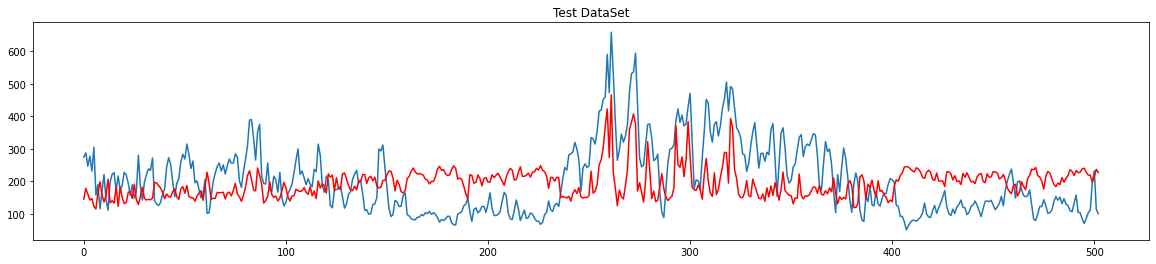

In [ ]:
t = np.arange(0,len(test_y),1)

plt.figure(figsize=(20,4))
plt.title("Test DataSet")
plt.plot(t,test_y,label="actual")
plt.plot(t,test_predict,'r',label="predicted")
plt.show()

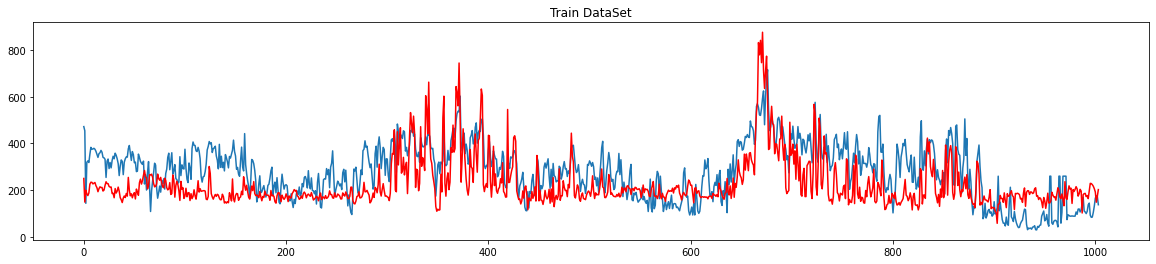

In [ ]:
t = np.arange(0,len(train_y),1)

plt.figure(figsize=(20,4))
plt.title("Train DataSet")
plt.plot(t,train_y,label="actual")
plt.plot(t,train_predict,'r',label="predicted")
plt.show()

## __LSTM__ 

Long Short Term Memory Nets

In [ ]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
val_x = val_x.reshape((val_x.shape[0], 1, val_x.shape[1]))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


callbacks = keras.callbacks.ModelCheckpoint(
    filepath="models/lstm.keras", 
    save_best_only=True, 
    monitor="val_loss"
)

model = Sequential()
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics="mae")

In [ ]:
history = model.fit(train_x, train_y, epochs=150, validation_data=(test_x, test_y), shuffle=False, callbacks=callbacks)

Epoch 1/150
32/32 [==============================] - 5s 35ms/step - loss: 91946.4609 - mae: 279.6709 - val_loss: 52347.0547 - val_mae: 203.1993
Epoch 2/150
32/32 [==============================] - 0s 15ms/step - loss: 91716.0391 - mae: 279.3375 - val_loss: 52226.4180 - val_mae: 202.9716
Epoch 3/150
32/32 [==============================] - 1s 18ms/step - loss: 91396.1328 - mae: 278.8696 - val_loss: 52042.9805 - val_mae: 202.6031
Epoch 4/150
32/32 [==============================] - 0s 15ms/step - loss: 90944.5469 - mae: 278.2017 - val_loss: 51786.8672 - val_mae: 202.0643
Epoch 5/150
32/32 [==============================] - 0s 15ms/step - loss: 90350.3750 - mae: 277.3075 - val_loss: 51450.2773 - val_mae: 201.3265
Epoch 6/150
32/32 [==============================] - 0s 16ms/step - loss: 89625.9141 - mae: 276.1969 - val_loss: 51030.7500 - val_mae: 200.3759
Epoch 7/150
32/32 [==============================] - 0s 15ms/step - loss: 88754.3047 - mae: 274.8456 - val_loss: 50527.4062 - val_mae: 1

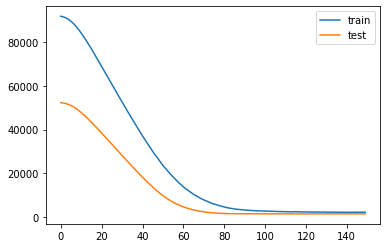

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("models/lstm.keras")

In [ ]:
train_predict = model.predict(train_x)    
test_predict = model.predict(test_x)
val_predict = model.predict(val_x)  

16/16 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(train_y, train_predict))
rmse_test = sqrt(mean_squared_error(test_y, test_predict))
print('Train RMSE: %.3f' % rmse_train)
print('Test RMSE: %.3f' % rmse_test)

Train RMSE: 46.207
Test RMSE: 36.872


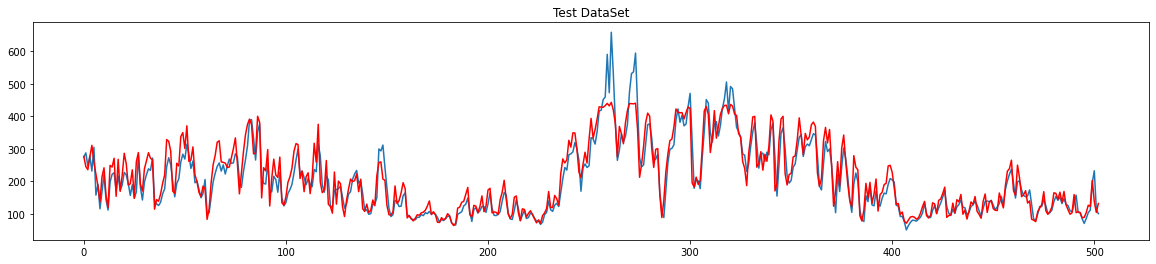

In [ ]:
t = np.arange(0,len(test_y),1)

plt.figure(figsize=(20,4))
plt.title("Test DataSet")
plt.plot(t,test_y,label="actual")
plt.plot(t,test_predict,'r',label="predicted")
plt.show()

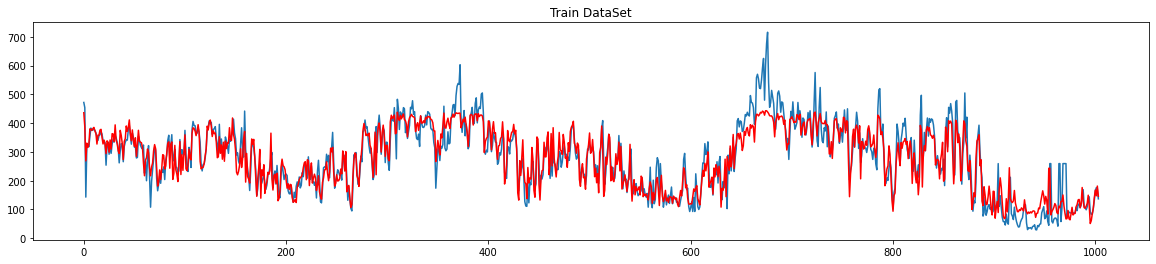

In [ ]:
t = np.arange(0,len(train_y),1)

plt.figure(figsize=(20,4))
plt.title("Train DataSet")
plt.plot(t,train_y,label="actual")
plt.plot(t,train_predict,'r',label="predicted")
plt.show()